In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Data Representation in Scikit-Learn

In [6]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    precision_recall_curve, roc_curve, roc_auc_score
    
)
from sklearn.model_selection import GridSearchCV

# Machine Learning: Data Representation in Scikit-Learn

In [7]:
#data=pd.read_csv('france.csv')
data31=pd.read_csv('france31.csv')

# Data as table: A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements

In [8]:
data31.head()

,Unnamed: 0,totalearning,capitalincome,transferrec,transferpaid,priceindex2015,meandi,saving
0,2012,20240,2710,5730,-4590,98.60500,26170,2617.00
1,2013,20520,2340,5750,-4800,99.45667,25850,2197.25
2,2014,20840,2410,5740,-5000,99.96167,26060,2319.34
3,2015,21040,2310,5780,-4830,99.99917,26260,2179.58
4,2016,21460,2070,5700,-4870,100.18250,26300,2156.60


In [9]:
data31 = data31.drop('Unnamed: 0', axis=1)

In [10]:
data31.columns

Index(['totalearning', 'capitalincome', 'transferrec', 'transferpaid',
       'priceindex2015', 'meandi', 'saving'],
      dtype='object')

In [11]:
import matplotlib.pyplot as mp
data31.corr()

,totalearning,capitalincome,transferrec,transferpaid,priceindex2015,meandi,saving
totalearning,1.000000,-0.279288,-0.757628,-0.937070,0.991709,0.968509,0.350294
capitalincome,-0.279288,1.000000,0.304340,0.185130,-0.230677,-0.045563,0.720740
transferrec,-0.757628,0.304340,1.000000,0.630508,-0.707577,-0.716054,-0.316815
transferpaid,-0.937070,0.185130,0.630508,1.000000,-0.963940,-0.898802,-0.308936
priceindex2015,0.991709,-0.230677,-0.707577,-0.963940,1.000000,0.965564,0.362460
meandi,0.968509,-0.045563,-0.716054,-0.898802,0.965564,1.000000,0.559111
saving,0.350294,0.720740,-0.316815,-0.308936,0.362460,0.559111,1.000000


In [23]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data31['saving'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")
    
#ADF Test Statistic: -2.12
#Critial Values:
#   1%, -3.69
#Critial Values:
#   5%, -2.97
#Critial Values:
#   10%, -2.63    
#compare the ADF test statistic of -2.09 against the critical values. 
#We see that the test statistic is less than all of the critical values, 
#so we cannot reject the null hypothesis 
#saving is non-stationary; we see trends, and it’s mean and variance are changing.

ADF Statistic: -2.09
Critial Values:
   1%, -6.05
Critial Values:
   5%, -3.93
Critial Values:
   10%, -2.99

p-value: 0.25
Stationary


In [24]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data31['meandi'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')

print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: 1.32
Critial Values:
   1%, -6.05
Critial Values:
   5%, -3.93
Critial Values:
   10%, -2.99

p-value: 1.00
Stationary


In [25]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data31['priceindex2015'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -0.44
Critial Values:
   1%, -6.05
Critial Values:
   5%, -3.93
Critial Values:
   10%, -2.99

p-value: 0.90
Stationary


In [26]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data31['transferpaid'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -0.72
Critial Values:
   1%, -4.94
Critial Values:
   5%, -3.48
Critial Values:
   10%, -2.84

p-value: 0.84
Stationary


In [27]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data31['transferrec'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -0.93
Critial Values:
   1%, -4.94
Critial Values:
   5%, -3.48
Critial Values:
   10%, -2.84

p-value: 0.78
Stationary


In [28]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data31['capitalincome'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Non-Stationary") if p_value > 0.05 else print("Stationary")

print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -8.90
Critial Values:
   1%, -6.05
Critial Values:
   5%, -3.93
Critial Values:
   10%, -2.99

p-value: 0.00
Stationary

p-value: 0.00
Non-Stationary


In [30]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data31['totalearning'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: 1.85
Critial Values:
   1%, -5.35
Critial Values:
   5%, -3.65
Critial Values:
   10%, -2.90

p-value: 1.00
Stationary


In [75]:
data31.describe()

,totalearning,capitalincome,transferrec,transferpaid,priceindex2015,meandi,saving
count,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.00000
mean,21618.750000,2343.750000,5708.750000,-5001.25000,100.843026,26693.750000,2343.06875
std,1254.232121,189.581306,49.117207,313.16073,1.909861,903.199669,186.82237
min,20240.000000,2070.000000,5640.000000,-5470.00000,98.605000,25850.000000,2156.60000
25%,20760.000000,2272.500000,5667.500000,-5115.00000,99.835420,26142.500000,2192.83250
50%,21250.000000,2345.000000,5715.000000,-4930.00000,100.090835,26280.000000,2284.43000
75%,22265.000000,2402.500000,5742.500000,-4822.50000,101.685025,27020.000000,2463.00500
max,23790.000000,2710.000000,5780.000000,-4590.00000,104.232500,28390.000000,2617.00000


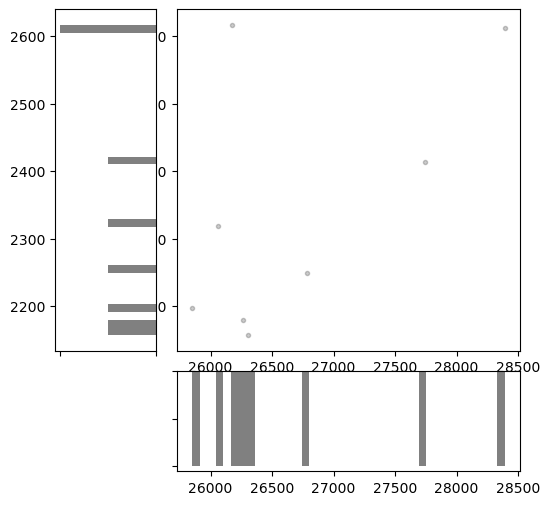

In [77]:
x=data31['meandi']
y=data31['saving']

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

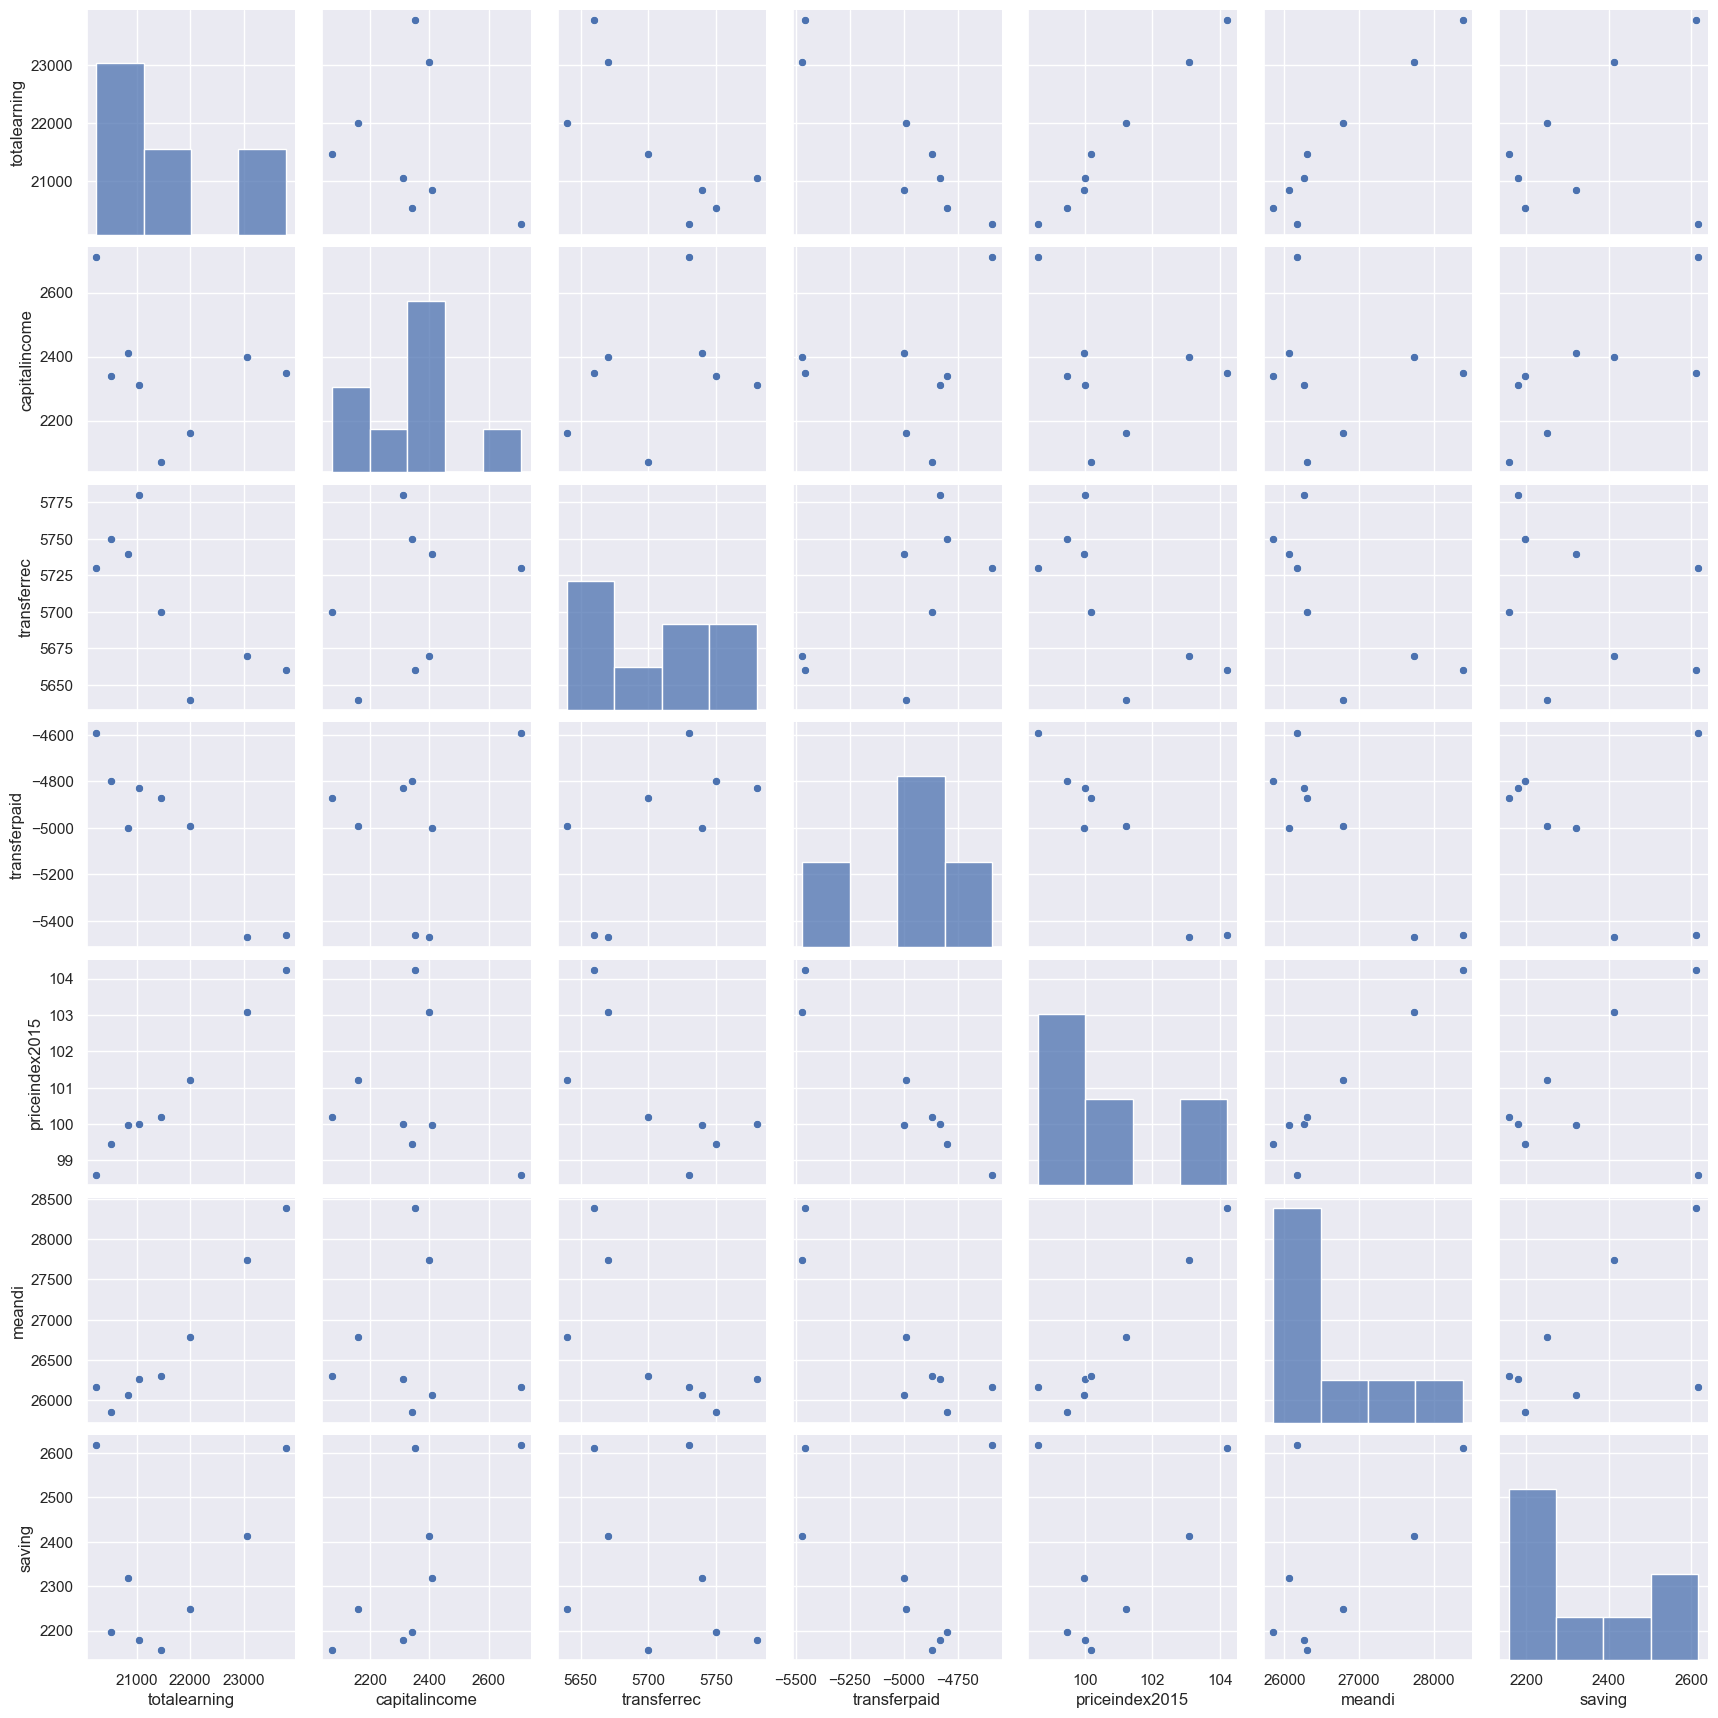

In [79]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(data31)

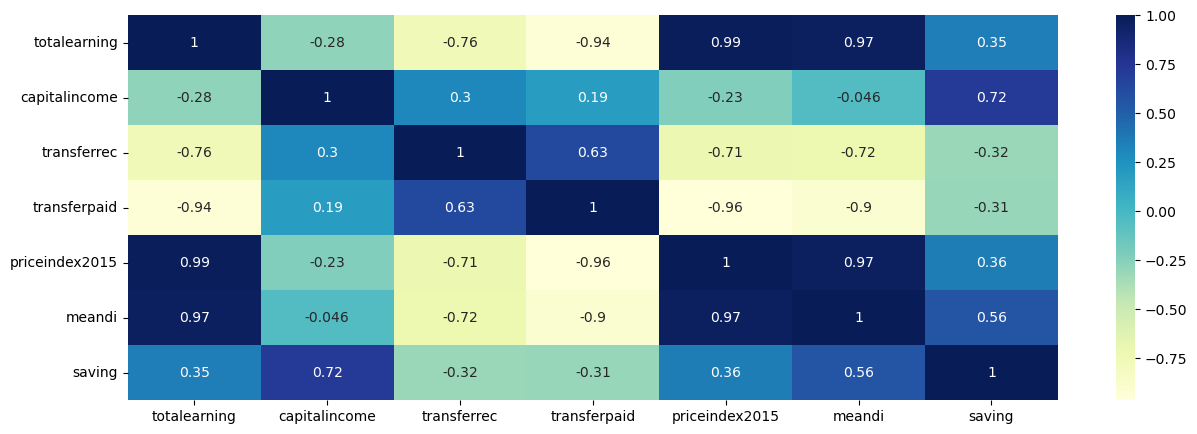

In [55]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 5))
dataplot = sb.heatmap(data31.corr(), cmap="YlGnBu", annot=True)
mp.show()

In [57]:
data31a = data31.drop('priceindex2015', axis=1)

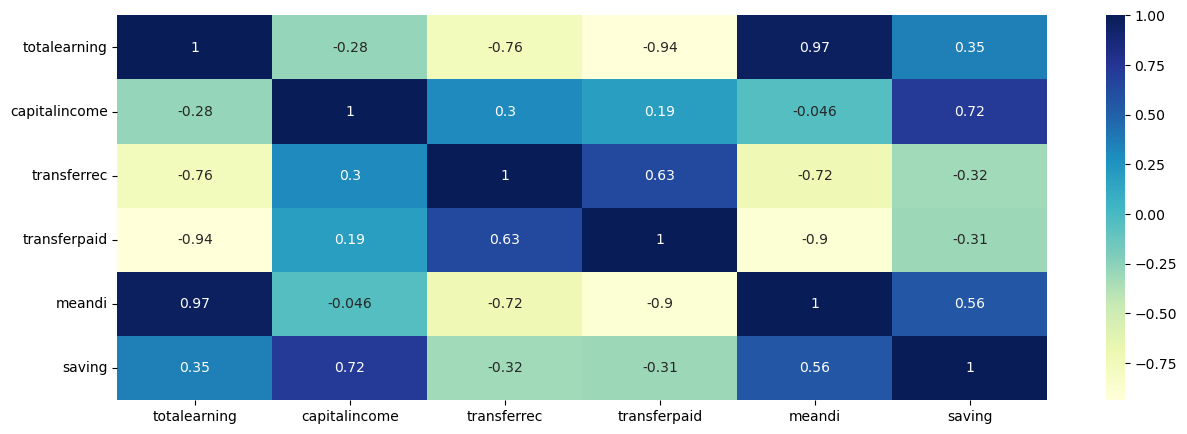

In [58]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 5))
dataplot = sb.heatmap(data31a.corr(), cmap="YlGnBu", annot=True)
mp.show()

In [59]:
import matplotlib.pyplot as mp
data31a.corr()

,totalearning,capitalincome,transferrec,transferpaid,meandi,saving
totalearning,1.000000,-0.279288,-0.757628,-0.937070,0.968509,0.350294
capitalincome,-0.279288,1.000000,0.304340,0.185130,-0.045563,0.720740
transferrec,-0.757628,0.304340,1.000000,0.630508,-0.716054,-0.316815
transferpaid,-0.937070,0.185130,0.630508,1.000000,-0.898802,-0.308936
meandi,0.968509,-0.045563,-0.716054,-0.898802,1.000000,0.559111
saving,0.350294,0.720740,-0.316815,-0.308936,0.559111,1.000000


# Candidates for Features matrix

In [63]:
data31a.columns

Index(['totalearning', 'capitalincome', 'transferrec', 'transferpaid',
       'meandi', 'saving'],
      dtype='object')

# For use in Scikit-Learn, we will extract the features matrix and target array from the DataFrame

In [86]:
y_data31a = data31a['saving']
y_data31a.shape

(8,)

In [87]:
X_data31a = data31a.drop('saving', axis=1)
X_data31a.shape

(8, 5)

In [105]:
data31a.dtypes

totalearning       int64
capitalincome      int64
transferrec        int64
transferpaid       int64
meandi             int64
saving           float64
dtype: object

In [106]:
data31a.columns

Index(['totalearning', 'capitalincome', 'transferrec', 'transferpaid',
       'meandi', 'saving'],
      dtype='object')

In [107]:
data31a.describe()

,totalearning,capitalincome,transferrec,transferpaid,meandi,saving
count,8.000000,8.000000,8.000000,8.00000,8.000000,8.00000
mean,21618.750000,2343.750000,5708.750000,-5001.25000,26693.750000,2343.06875
std,1254.232121,189.581306,49.117207,313.16073,903.199669,186.82237
min,20240.000000,2070.000000,5640.000000,-5470.00000,25850.000000,2156.60000
25%,20760.000000,2272.500000,5667.500000,-5115.00000,26142.500000,2192.83250
50%,21250.000000,2345.000000,5715.000000,-4930.00000,26280.000000,2284.43000
75%,22265.000000,2402.500000,5742.500000,-4822.50000,27020.000000,2463.00500
max,23790.000000,2710.000000,5780.000000,-4590.00000,28390.000000,2617.00000


In [110]:
data31a_missing=data31a.isna().sum()
data31a_missing

totalearning     0
capitalincome    0
transferrec      0
transferpaid     0
meandi           0
saving           0
dtype: int64

<Axes: >

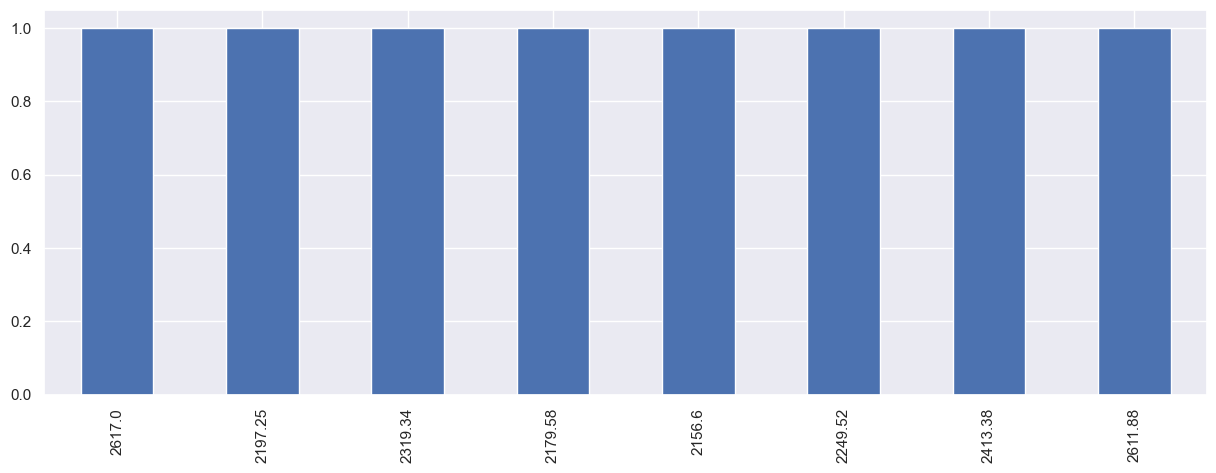

In [113]:
data31a.saving.value_counts().plot.bar(figsize=(15, 5))

<Axes: >

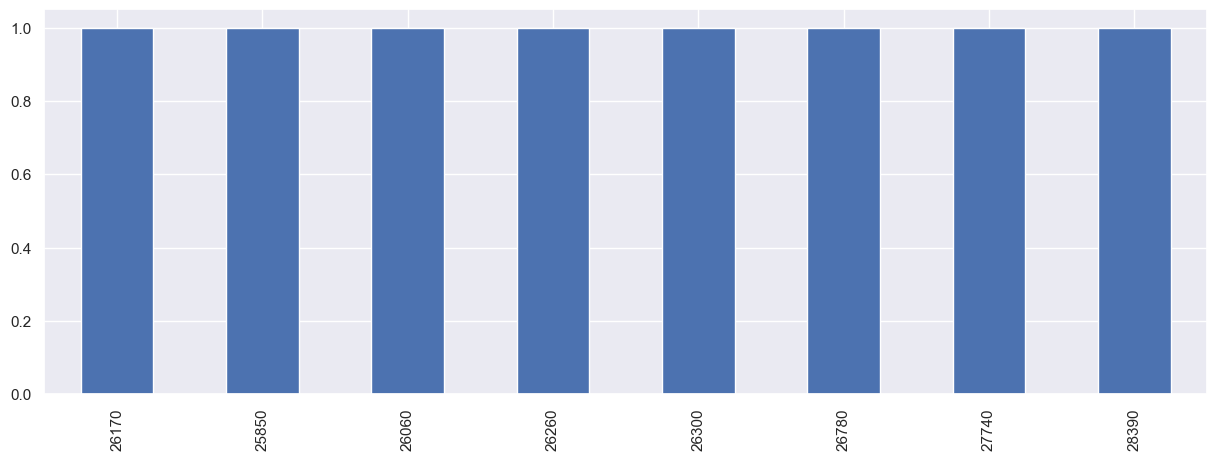

In [114]:
data31a.meandi.value_counts().plot.bar(figsize=(15, 5))

# Supervised learning example: Simple linear regression

In [124]:
import matplotlib.pyplot as plt
X = data31a[['totalearning','capitalincome','transferrec','meandi']]
y = data31a['saving']

# 1. Choose a class of model

In [125]:
from sklearn.linear_model import LinearRegression

# 2. Choose model hyperparameters. Would we like to fit for the offset (i.e., y-intercept)?

In [126]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

# 3. Arrange data into a features matrix and target vector

In [127]:
X.shape

(8, 4)

In [123]:
y.shape

(8,)

# 3.A generate regression dataset

In [136]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=1)

# 4. Fit the model to your data

In [137]:
model.fit(X, y)

LinearRegression()

In [149]:
X.shape

(100, 2)

In [150]:
y.shape

(100,)

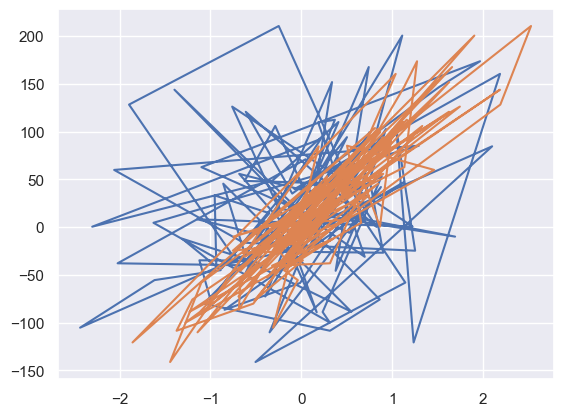

In [153]:
plt.plot(X, y)

In [138]:
model.coef_

array([32.25850999, 86.42024677])

In [139]:
model.intercept_

0.007303861711072557

# 5. Predict labels for unknown data

In [141]:
# new instances where we do not know the answer
Xfit, _ = make_regression(n_samples=3, n_features=2, noise=0.1, random_state=1)
# make a prediction
yfit = model.predict(Xfit)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
 print("X=%s, Predicted=%s" % (Xfit[i], yfit[i]))

X=[-1.07296862 -0.52817175], Predicted=-80.2497983168563
X=[-0.61175641  1.62434536], Predicted=120.649280643451
X=[-2.3015387   0.86540763], Predicted=0.5518357031231957


In [142]:
yfit = model.predict(Xfit)

In [145]:
Xfit.shape

(3, 2)

In [146]:
yfit.shape

(3,)

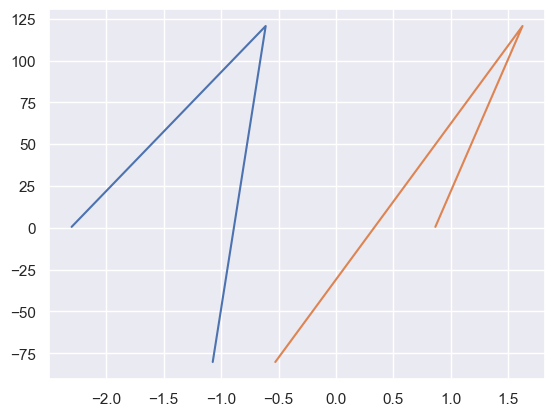

In [171]:
#plt.scatter(X, y)
plt.plot(Xfit, yfit)

In [202]:
X=Xfit
y=yfit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state= 100)

In [207]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [214]:
X.reshape(-1, 1)
y.reshape(-1, 1)

array([[-80.24979832],
       [120.64928064],
       [  0.5518357 ]])

In [215]:
model = LinearRegression().fit(x, y)

ValueError: Expected 2D array, got 1D array instead:
array=[3.74540119 9.50714306 7.31993942 5.98658484 1.5601864  1.5599452
 0.58083612 8.66176146 6.01115012 7.08072578 0.20584494 9.69909852
 8.32442641 2.12339111 1.81824967 1.8340451  3.04242243 5.24756432
 4.31945019 2.9122914  6.11852895 1.39493861 2.92144649 3.66361843
 4.56069984 7.85175961 1.99673782 5.14234438 5.92414569 0.46450413
 6.07544852 1.70524124 0.65051593 9.48885537 9.65632033 8.08397348
 3.04613769 0.97672114 6.84233027 4.40152494 1.22038235 4.9517691
 0.34388521 9.09320402 2.58779982 6.62522284 3.11711076 5.20068021
 5.46710279 1.84854456].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [194]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#### Examine all variables and their types in the following cell

In [7]:
data.head()

,LOCATION,Country,MEASURE,Measure,AGE,Age group,DEFINITION,Definition,METHODO,Methodology,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2012,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.326,NaN,NaN
1,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2014,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.337,NaN,NaN
2,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2016,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.330,NaN,NaN
3,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2018,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.325,NaN,NaN
4,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2020,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.318,NaN,NaN


In [9]:
Data=data.drop(columns=['Unit Code', 'Unit', 'PowerCode Code', 'Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags', 'PowerCode'])

In [11]:
Data.isna().sum()

LOCATION       0
Country        0
MEASURE        0
Measure        0
AGE            0
Age group      0
DEFINITION     0
Definition     0
METHODO        0
Methodology    0
TIME           0
Year           0
Value          0
dtype: int64

In [12]:
Data['AGE']

0        TOT
1        TOT
2        TOT
3        TOT
4        TOT
        ... 
77177     WA
77178    TOT
77179    OLD
77180     WA
77181     WA
Name: AGE, Length: 77182, dtype: object

In [13]:
Data['Age group'].unique()

array(['Total population', 'Working age population: 18-65',
       'Retirement age population: above 65'], dtype=object)

In [14]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77182 entries, 0 to 77181
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     77182 non-null  object 
 1   Country      77182 non-null  object 
 2   MEASURE      77182 non-null  object 
 3   Measure      77182 non-null  object 
 4   AGE          77182 non-null  object 
 5   Age group    77182 non-null  object 
 6   DEFINITION   77182 non-null  object 
 7   Definition   77182 non-null  object 
 8   METHODO      77182 non-null  object 
 9   Methodology  77182 non-null  object 
 10  TIME         77182 non-null  int64  
 11  Year         77182 non-null  int64  
 12  Value        77182 non-null  float64
dtypes: float64(1), int64(2), object(10)
memory usage: 7.7+ MB


In [15]:
Data.dtypes

LOCATION        object
Country         object
MEASURE         object
Measure         object
AGE             object
Age group       object
DEFINITION      object
Definition      object
METHODO         object
Methodology     object
TIME             int64
Year             int64
Value          float64
dtype: object

In [16]:
Data.describe()

,TIME,Year,Value
count,77182.000000,77182.000000,7.718200e+04
mean,2012.224586,2012.224586,8.152814e+05
std,3.923279,3.923279,1.042134e+07
min,2006.000000,2006.000000,-6.850000e+06
25%,2009.000000,2009.000000,1.950000e-01
50%,2012.000000,2012.000000,1.400000e+00
75%,2015.000000,2015.000000,3.225000e+03
max,2021.000000,2021.000000,1.207000e+09


In [17]:
pd.options.display.min_rows = 50
Data[Data['Country']=='Australia']

,LOCATION,Country,MEASURE,Measure,AGE,Age group,DEFINITION,Definition,METHODO,Methodology,TIME,Year,Value
0,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,2012,2012,0.32600
1,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,2014,2014,0.33700
2,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,2016,2016,0.33000
3,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,2018,2018,0.32500
4,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,2020,2020,0.31800
5,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2011,Income definition until 2011,2008,2008,0.33600
6,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2011,Income definition until 2011,2010,2010,0.33400
7,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2011,Income definition until 2011,2012,2012,0.32400
8,AUS,Australia,CPI2010,Consumer Price Index (base 2010=100),TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,2012,2012,105.12490
9,AUS,Australia,CPI2010,Consumer Price Index (base 2010=100),TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,2014,2014,110.37980


In [18]:
Data[Data['Country']=='Australia'].count()

LOCATION       890
Country        890
MEASURE        890
Measure        890
AGE            890
Age group      890
DEFINITION     890
Definition     890
METHODO        890
Methodology    890
TIME           890
Year           890
Value          890
dtype: int64

In [19]:
#len(Data['Measure'].unique())
Data['Measure'].unique()

array(['Gini (disposable income, post taxes and transfers)',
       'Consumer Price Index (base 2010=100)',
       'Age group 0-17: Poverty rate after taxes and transfers',
       'Total earnings (current prices)',
       'Current transfers received from public social security (Current prices)',
       'Income from self-employment (current prices)',
       'Taxes and social security contributions paid directly by households (Current prices)',
       'Age group 0-17: mean disposable income (current prices)',
       'Age group 18-25: mean disposable income (current prices)',
       'Current transfers received from employment-related social insurance schemes (Current prices)',
       'Capital income (current prices)',
       'Age group 18-25: Poverty rate after taxes and transfers',
       'Purchasing Power Parities for private consumption',
       'Standard error Gini (post taxes and transfers)',
       'Mean disposable income (current prices)',
       'Gini (market income, before taxes 

In [20]:
pd.crosstab(Data['Measure']=='Total earnings (current prices)', Data['Country']=='Austria')

Country,False,True
Measure,,
False,73743,1538
True,1859,42


In [104]:
Data['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland',
       'Türkiye', 'United Kingdom', 'United States', 'Chile', 'Estonia',
       'Israel', 'Russia', 'Slovenia', 'Latvia', 'Lithuania', 'Brazil',
       "China (People's Republic of)", 'Costa Rica', 'India',
       'South Africa', 'Bulgaria', 'Romania'], dtype=object)

In [82]:
Data['Measure'].unique()

array(['Gini (disposable income, post taxes and transfers)',
       'Consumer Price Index (base 2010=100)',
       'Age group 0-17: Poverty rate after taxes and transfers',
       'Total earnings (current prices)',
       'Current transfers received from public social security (Current prices)',
       'Income from self-employment (current prices)',
       'Taxes and social security contributions paid directly by households (Current prices)',
       'Age group 0-17: mean disposable income (current prices)',
       'Age group 18-25: mean disposable income (current prices)',
       'Current transfers received from employment-related social insurance schemes (Current prices)',
       'Capital income (current prices)',
       'Age group 18-25: Poverty rate after taxes and transfers',
       'Purchasing Power Parities for private consumption',
       'Standard error Gini (post taxes and transfers)',
       'Mean disposable income (current prices)',
       'Gini (market income, before taxes 

In [83]:
Data.columns

Index(['LOCATION', 'Country', 'MEASURE', 'Measure', 'AGE', 'Age group',
       'DEFINITION', 'Definition', 'METHODO', 'Methodology', 'TIME', 'Year',
       'Value'],
      dtype='object')

In [84]:
len(Data.columns)

13

# 1. Perform Exploratory Data Analysis (EDA) and data cleaning.

In [85]:
Data['Value'].values

array([  0.326,   0.337,   0.33 , ..., -29.   ,   0.   ,   0.   ])

In [93]:
import matplotlib.pyplot as mp
Data.corr()

C:\Users\dvjp3\AppData\Local\Temp\ipykernel_21600\393145683.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Data.corr()


,TIME,Year,Value
TIME,1.000000,1.000000,0.008052
Year,1.000000,1.000000,0.008052
Value,0.008052,0.008052,1.000000


C:\Users\dvjp3\AppData\Local\Temp\ipykernel_21600\1475843005.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(Data.corr(), cmap="YlGnBu", annot=True)


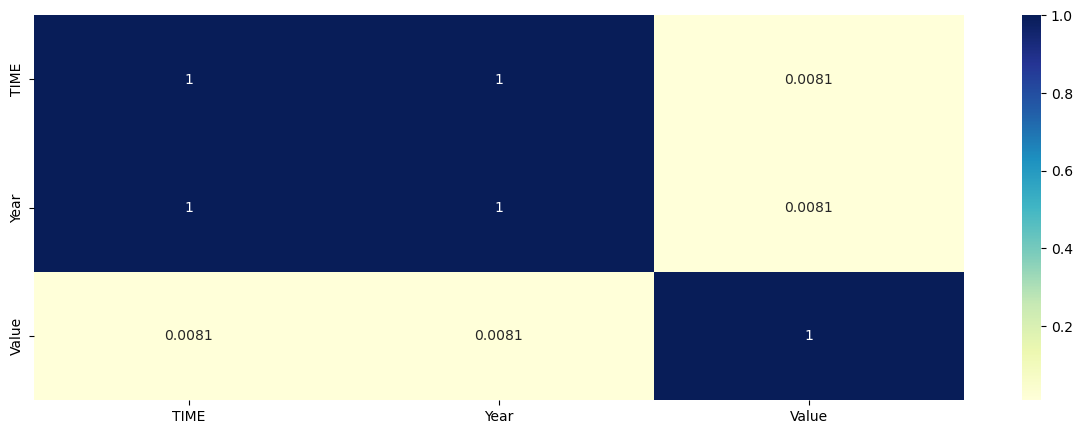

In [94]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 5))
dataplot = sb.heatmap(Data.corr(), cmap="YlGnBu", annot=True)
mp.show()

In [129]:
Data.filter(like='Consumer Price Index (base 2015=100)')

ValueError: Cannot describe a DataFrame without columns

In [60]:
Data.filter(like='Operating').values

array([[6.01457213e-01, 9.98969203e-01, 1.25696869e-04, ...,
        9.58848340e-02, 3.92912869e-01, 3.34015171e-01],
       [6.10235086e-01, 9.98945978e-01, 2.89785054e-04, ...,
        9.37433843e-02, 3.91589969e-01, 3.41105992e-01],
       [6.01450006e-01, 9.98857353e-01, 2.36129721e-04, ...,
        9.23184653e-02, 3.81967843e-01, 3.36731495e-01],
       ...,
       [6.10444083e-01, 9.98984455e-01, 2.50931192e-04, ...,
        1.00102594e-01, 3.93693042e-01, 3.58847448e-01],
       [6.07849637e-01, 9.99073773e-01, 1.23615412e-04, ...,
        1.11721791e-01, 3.96734583e-01, 3.80250762e-01],
       [6.27408870e-01, 9.98080298e-01, 1.43169543e-03, ...,
        9.24650284e-02, 3.85766943e-01, 2.39584724e-01]])

In [56]:
Data.filter(like='ROA').head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax
0,0.370594,0.424389,0.405750
1,0.464291,0.538214,0.516730
2,0.426071,0.499019,0.472295
3,0.399844,0.451265,0.457733
4,0.465022,0.538432,0.522298


In [59]:
Data.filter(like='ROA').values

array([[0.37059426, 0.42438945, 0.40574977],
       [0.46429094, 0.53821413, 0.51673002],
       [0.42607127, 0.49901875, 0.47229509],
       ...,
       [0.47272461, 0.533744  , 0.52063815],
       [0.50626432, 0.5599106 , 0.55404465],
       [0.49305319, 0.57010467, 0.54954762]])

In [57]:
Data.filter(like='Sales').head()

,Realized Sales Gross Margin,Realized Sales Gross Profit Growth Rate,Cash Flow to Sales,Gross Profit to Sales
0,0.601457,0.022102,0.671568,0.601453
1,0.610235,0.022080,0.671570,0.610237
2,0.601364,0.022760,0.671571,0.601449
3,0.583541,0.022046,0.671519,0.583538
4,0.598783,0.022096,0.671563,0.598782


In [61]:
Data.filter(like='Sales').values

array([[0.60145721, 0.02210228, 0.67156765, 0.60145329],
       [0.61023509, 0.02208017, 0.67156994, 0.61023653],
       [0.60136352, 0.0227601 , 0.67157132, 0.60144934],
       ...,
       [0.61021347, 0.02206835, 0.67156372, 0.61044059],
       [0.60784964, 0.02234993, 0.67160595, 0.60784592],
       [0.62740887, 0.02531588, 0.67209645, 0.62740824]])

In [58]:
Data.filter(like='Net').head()

,Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Per Share Net profit before tax (Yuan ¥),After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Net Value Growth Rate,Net worth/Assets,Contingent liabilities/Net worth,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Net Worth Turnover Rate (times),Net Income to Total Assets,Net Income to Stockholder's Equity,Net Income Flag
0,0.147950,0.147950,0.147950,0.138736,0.688979,0.688979,0.217535,0.000327,0.792424,0.006479,0.137757,0.398036,0.032903,0.716845,0.827890,1
1,0.182251,0.182251,0.182251,0.169918,0.689693,0.689702,0.217620,0.000443,0.828824,0.005835,0.168962,0.397725,0.025484,0.795297,0.839969,1
2,0.177911,0.177911,0.193713,0.142803,0.689463,0.689470,0.217601,0.000396,0.792484,0.006562,0.148036,0.406580,0.013387,0.774670,0.836774,1
3,0.154187,0.154187,0.154187,0.148603,0.689110,0.689110,0.217568,0.000382,0.848535,0.005366,0.147561,0.397925,0.028065,0.739555,0.834697,1
4,0.167502,0.167502,0.167502,0.168412,0.689697,0.689697,0.217626,0.000439,0.893491,0.006624,0.167461,0.400079,0.040161,0.795016,0.839973,1


In [62]:
Data.filter(like='Net').values

array([[0.14794994, 0.14794994, 0.14794994, ..., 0.71684534, 0.82789021,
        1.        ],
       [0.18225106, 0.18225106, 0.18225106, ..., 0.79529714, 0.83996927,
        1.        ],
       [0.17791075, 0.17791075, 0.19371287, ..., 0.7746697 , 0.83677431,
        1.        ],
       ...,
       [0.26952088, 0.26952088, 0.26952088, ..., 0.79777807, 0.84013826,
        1.        ],
       [0.21339177, 0.21339177, 0.21339177, ..., 0.8118079 , 0.84108361,
        1.        ],
       [0.22076609, 0.22076609, 0.22076609, ..., 0.81595588, 0.84101855,
        1.        ]])

In [63]:
Data.filter(like='interest').head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Continuous interest rate (after tax),Interest-bearing debt interest rate
0,0.370594,0.424389,0.405750,0.780985,0.000725
1,0.464291,0.538214,0.516730,0.781506,0.000647
2,0.426071,0.499019,0.472295,0.780284,0.000790
3,0.399844,0.451265,0.457733,0.781241,0.000449
4,0.465022,0.538432,0.522298,0.781550,0.000686


In [64]:
Data.filter(like='interest').values

array([[3.70594257e-01, 4.24389446e-01, 4.05749772e-01, 7.80984850e-01,
        7.25072507e-04],
       [4.64290937e-01, 5.38214130e-01, 5.16730018e-01, 7.81505974e-01,
        6.47064706e-04],
       [4.26071272e-01, 4.99018753e-01, 4.72295091e-01, 7.80283936e-01,
        7.90079008e-04],
       ...,
       [4.72724614e-01, 5.33744003e-01, 5.20638150e-01, 7.81546395e-01,
        0.00000000e+00],
       [5.06264320e-01, 5.59910597e-01, 5.54044649e-01, 7.81663308e-01,
        2.11021102e-04],
       [4.93053186e-01, 5.70104666e-01, 5.49547620e-01, 7.86079039e-01,
        5.90000000e+08]])

In [65]:
Data.filter(like='Operating Profit Rate')

,Operating Profit Rate
0,0.998969
1,0.998946
2,0.998857
3,0.998700
4,0.998973
5,0.998758
6,0.998993
7,0.999009
8,0.998961
9,0.999001


In [70]:
Data.filter(like='Operating Profit Rate').values

array([[0.9989692 ],
       [0.99894598],
       [0.99885735],
       ...,
       [0.99898446],
       [0.99907377],
       [0.9980803 ]])

In [72]:
Data.filter(like='Equity to Liability').sort_values
#E/L ratio varies from 1% to 23%

<bound method DataFrame.sort_values of        Equity to Liability
0                 0.016469
1                 0.020794
2                 0.016474
3                 0.023982
4                 0.035490
5                 0.019534
6                 0.015663
7                 0.034889
8                 0.065826
9                 0.030801
10                0.036572
11                0.040381
12                0.025282
13                0.035464
14                0.042646
15                0.038354
16                0.062940
17                0.048822
18                0.025953
19                0.049622
20                0.039507
21                0.037680
22                0.024915
23                0.018005
24                0.017839
25                0.024869
26                0.041465
27                0.104842
28                0.042682
29                0.015349
...                    ...
6789              0.035334
6790              0.017872
6791              0.028561
6792            

In [30]:
Data.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
 Realized Sales Gross Margin                                float64
 Operating Profit Rate                                      float64
 Pre-tax net Interest Rate                                  float64
 After-tax net Interest Rate                                float64
 Non-industry income and expenditure/revenue                float64
 Continuous interest rate (after tax)                       float64
 Operating Expense Rate                                     float64
 Research and development expense rate                      float64
 Cash flow rate                                             float64
 Interest-bearing debt interest rate            

In [29]:
Data.isna().sum().sort_values(ascending=False)

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 Total expense/Assets                                       0
 Total income/Total expense                                 0
 Retained Earnings to Total Assets                          0
 Long-term Liability to Current Assets                      0
 Current Liabilities/Equity                                 0
 Working Capital/Equity                                     0
 Current Liabilities/Liability                              0
 Inventory/Current Liability                                0
 Inventory/Working Capital                                  0
 Operating Funds to Liability                               0
 Current Liability to Assets                                0
 Cash/Current Liability                                     0
 Quick Assets/Current Liability                             0
 Cash/Total Assets                                          0
 Current

# 2. Please conduct EDA and descriptive analytics

In [73]:
Data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [74]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
Data.describe

<bound method NDFrame.describe of       Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after

In [86]:
Data.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [89]:
Data[' Net Income to Total Assets']

0       0.716845
1       0.795297
2       0.774670
3       0.739555
4       0.795016
5       0.710420
6       0.736619
7       0.815350
8       0.803647
9       0.804195
10      0.814111
11      0.804887
12      0.803260
13      0.794158
14      0.819715
15      0.815419
16      0.810421
17      0.826642
18      0.806264
19      0.802552
20      0.804639
21      0.814012
22      0.808976
23      0.798104
24      0.803445
25      0.772909
26      0.812974
27      0.830176
28      0.812100
29      0.750431
          ...   
6789    0.665514
6790    0.791776
6791    0.811596
6792    0.809055
6793    0.842449
6794    0.839268
6795    0.868035
6796    0.818199
6797    0.784300
6798    0.862123
6799    0.824850
6800    0.772423
6801    0.836314
6802    0.837615
6803    0.801261
6804    0.804195
6805    0.817712
6806    0.812230
6807    0.814083
6808    0.805521
6809    0.776535
6810    0.846995
6811    0.815844
6812    0.806743
6813    0.794028
6814    0.799927
6815    0.799748
6816    0.7977

In [90]:
Data[' Operating Gross Margin']

0       0.601457
1       0.610235
2       0.601450
3       0.583541
4       0.598783
5       0.590171
6       0.619950
7       0.601738
8       0.603612
9       0.599209
10      0.614026
11      0.623712
12      0.608131
13      0.600578
14      0.604686
15      0.621773
16      0.606524
17      0.618451
18      0.598344
19      0.636259
20      0.622177
21      0.607446
22      0.618934
23      0.609507
24      0.602956
25      0.611763
26      0.626544
27      0.609738
28      0.602027
29      0.599115
          ...   
6789    0.605226
6790    0.599281
6791    0.600823
6792    0.596766
6793    0.622660
6794    0.609659
6795    0.607460
6796    0.604563
6797    0.613723
6798    0.625038
6799    0.606343
6800    0.619762
6801    0.620346
6802    0.609032
6803    0.601428
6804    0.600744
6805    0.603583
6806    0.610358
6807    0.603864
6808    0.606805
6809    0.606012
6810    0.602841
6811    0.612736
6812    0.613219
6813    0.595829
6814    0.604455
6815    0.598308
6816    0.6104

In [115]:
#X = Data.drop(' Realized Sales Gross Margin',axis = 1)
#y = Data[' Realized Sales Gross Margin']
#X = [Data[' Net Income to Total Assets'], Data[' Equity to Liability'], Data[' Gross Profit to Sales']]
#y = Data[' Realized Sales Gross Margin']

In [110]:
Data[' Realized Sales Gross Margin']

0       0.601457
1       0.610235
2       0.601364
3       0.583541
4       0.598783
5       0.590251
6       0.619950
7       0.601717
8       0.603612
9       0.599209
10      0.614026
11      0.623712
12      0.608138
13      0.600578
14      0.604686
15      0.621773
16      0.606524
17      0.618451
18      0.598344
19      0.636252
20      0.622256
21      0.607446
22      0.618934
23      0.609507
24      0.602956
25      0.611806
26      0.626544
27      0.609738
28      0.602293
29      0.599115
          ...   
6789    0.605010
6790    0.599353
6791    0.600823
6792    0.596766
6793    0.622018
6794    0.609781
6795    0.607460
6796    0.604563
6797    0.613723
6798    0.625038
6799    0.606379
6800    0.619784
6801    0.620346
6802    0.609024
6803    0.601428
6804    0.600744
6805    0.603590
6806    0.610358
6807    0.603864
6808    0.606805
6809    0.606012
6810    0.602841
6811    0.612527
6812    0.613168
6813    0.595858
6814    0.604462
6815    0.598308
6816    0.6102

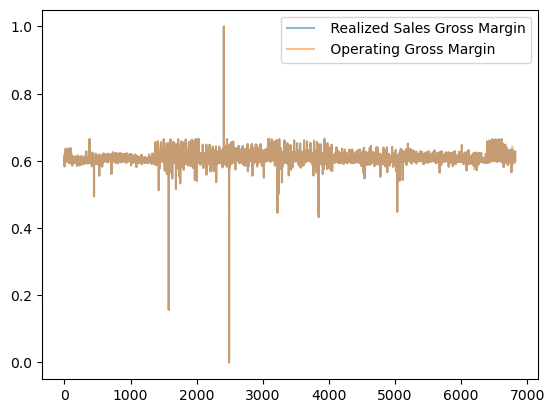

In [261]:
Data[[' Realized Sales Gross Margin', ' Operating Gross Margin']].plot(alpha=0.5); 

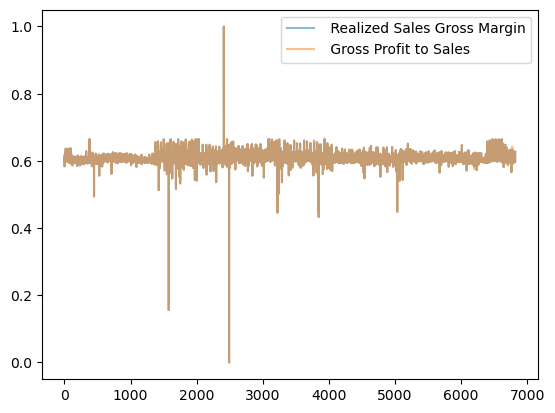

In [260]:
Data[[' Realized Sales Gross Margin', ' Gross Profit to Sales']].plot(alpha=0.5);

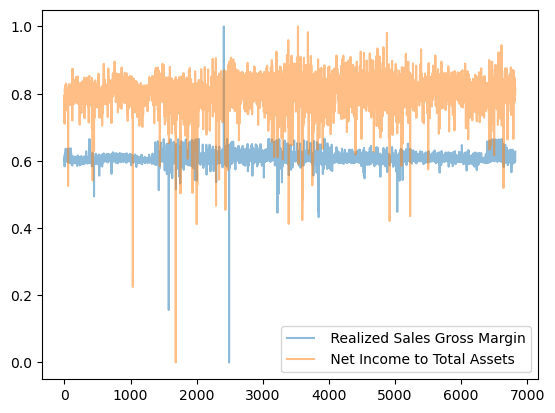

In [262]:
Data[[' Realized Sales Gross Margin', ' Net Income to Total Assets']].plot(alpha=0.5);  

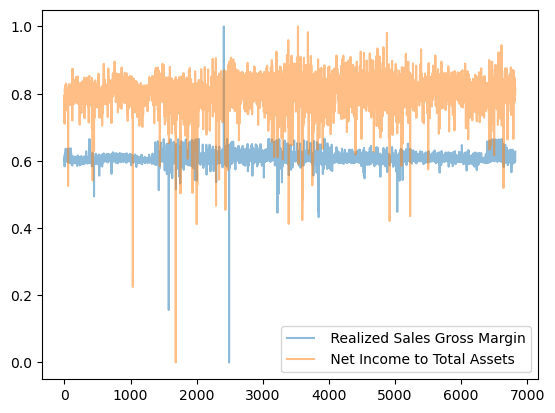

In [264]:
Data[[' Realized Sales Gross Margin', ' Net Income to Total Assets']].plot(alpha=0.5); 

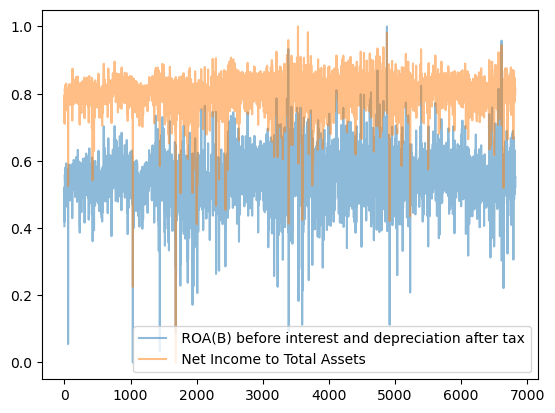

In [263]:
Data[[' ROA(B) before interest and depreciation after tax', ' Net Income to Total Assets']].plot(alpha=0.5);  

In [ ]:
# Data[' Gross Profit to Sales']
# Data[' Net Income to Total Assets

In [321]:
X = Data[" ROA(B) before interest and depreciation after tax"]
y = Data[' Net Income to Total Assets']

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=64)

# 1. Choose a class of model (KNeighborsRegressor)

In [310]:
y_test.shape

(1364,)

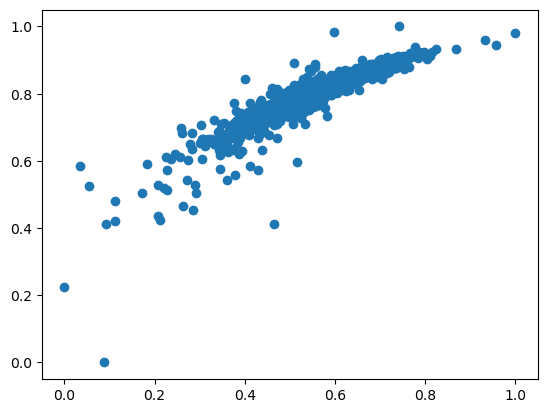

In [311]:
plt.scatter(X, y)

In [336]:
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [338]:
X_test = X_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [339]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [341]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [342]:
y_pred = knn.predict(X_test)

In [344]:
r2 = r2_score(y_test, y_pred)
print("r2:", r2)

r2: -0.23743077504593213


In [189]:
# separate majority/minority classes
no_bankruptcy = Data[Data['Bankrupt?']==0]
yes_bankruptcy = Data[Data['Bankrupt?']==1]

In [190]:
display(no_bankruptcy.shape)
display(yes_bankruptcy.shape)

(6599, 96)

(220, 96)

In [191]:
yes_bankruptcy.shape

(220, 96)